## Background of this notebook

In my previous notebook "Dealing with missing values (Part 1)", the number and types of missingness were analyzed for the combination of train data set and test data set. Based on the analysis results, the imputation was made for 'Fare' and 'Embarked' and the 'Cabin' variable was dropped.

In this notebook, I'll work on the imputation for 'Age'.

## Load packages and modules

### Load libraries, packages and modules

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')

In [17]:
def compare_hists(col_name, bins=None, df=df):
    plt.hist(df[df.Survived==1][col_name].dropna(), bins=bins, density=False, label='survived', alpha=0.5)
    plt.hist(df[df.Survived==0][col_name].dropna(), bins=bins, density=False, label='not survived',alpha=0.5)
    plt.title('Histograms of {}'.format(col_name))
    plt.xlabel(col_name)
    plt.ylabel('Number')
    plt.legend(loc='upper right')
    plt.show()

### Load the two datasets and combine them

In [18]:
#load train data
#train_df = pd.read_csv('../input/titanic/train.csv')
#test_df = pd.read_csv('../input/titanic/test.csv')
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
#create a new column 'Is_train' to differentiate the training data from the testing data, 1 = training, 0 = testing
train_df['Is_train'] = 1
test_df['Is_train'] = 0
#create the 'Survived' column filled with null values in the testing data
#so as to share the same columns as the training data
test_df['Survived'] = np.nan
#combine the trainning data and testing data
full_df = pd.concat([train_df, test_df], ignore_index=True)
# delete the two dataframes which are no longer needed
del train_df, test_df

## Prepare data

### Fix some data errors and fill in a couple of missing age values

References:   
[Some SibSp/Parch values are wrong](https://www.kaggle.com/c/titanic/discussion/39787)   
[Miss Erna Alexandra Andersson](https://www.encyclopedia-titanica.org/titanic-survivor/erna-andersson.html)   
[Miss Ida Augusta Margareta Andersson](https://www.encyclopedia-titanica.org/titanic-victim/ida-augusta-margareta-andersson.html)

In [19]:
#fix the errors and fill in the missing age values for the Sammann family
full_df.loc[279, ['SibSp', 'Parch']]= 0, 2
full_df.loc[1283, ['SibSp', 'Parch']] = 1, 1
full_df.loc[987, 'Age'] = 26
full_df.loc[1188, ['Age', 'SibSp', 'Parch']] = 40, 0, 2
full_df.loc[48, ['Age', 'SibSp', 'Parch']] = 16, 1, 1
full_df.loc[920, ['Age', 'SibSp', 'Parch']] = 18, 1, 1
full_df.loc[68, ['SibSp', 'Parch']] = 0, 0
full_df.loc[1105, ['SibSp', 'Parch']] = 0, 0
full_df.loc[736, ['SibSp', 'Parch']] = 0, 4
full_df.loc[[436, 1058, 86, 147], ['SibSp', 'Parch']] = 3, 1

#fix two more errors were found during my deep analysis of fare variable
full_df.loc[[451, 490], 'Fare'] = 6.9667

### Handling the missing values of 'Fare' and 'Embarked' and the 'Cabin'

In [20]:
full_df.loc[1043, 'Fare'] = 7.8292
full_df.loc[[61, 829], 'Embarked'] = 'S'
df = full_df.drop('Cabin', axis=1)
del full_df

## Impute 'Age'

### Review how survival rates vary with age

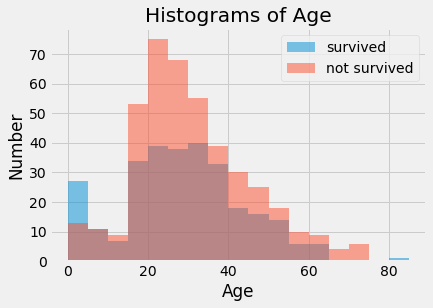

In [21]:
compare_hists('Age', bins=np.arange(0, 90, 5))

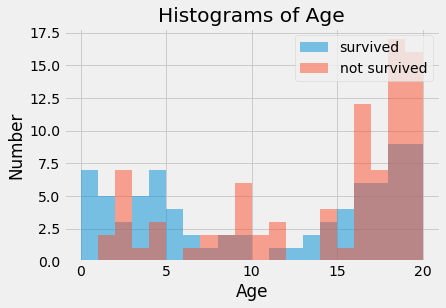

In [26]:
compare_hists('Age', bins=np.arange(21), df=df[df.Age<20])

**Finding:**  
The passengers under 15 (esp under 5) had much higher survival rates than the rest.  
Very few passengers over 65 survived.

## Imputation strategy

### Impute with median?

In [27]:
df.Age.median()

28.0

In [28]:
df.loc[df.Age.isnull(), 'Sex'].value_counts()

male      182
female     78
Name: Sex, dtype: int64

With the imputation with the median, a boy who had a high chance of survival will be categorized as a man who had a low chance of survival.